[25, 25, 26, 27, 28, 28, 29, 30, 31, 31, 32, 33, 34, 34, 35, 36, 37, 37, 38, 39]
[4.521865061945848, 4.275593333255259, 5.307170239012306, 4.599547941585053, 5.2734220872508075, 4.671616553292004, 5.823137298099045, 6.526182865505208, 5.890725006117039, 6.689513615776142, 7.277908563045617, 7.4835350915571635, 6.90206287399, 6.680257152981189, 7.104181068413219, 7.328282654624404, 6.987428698526872, 7.5687716865251975, 7.8078755082783164, 7.8460904217671]


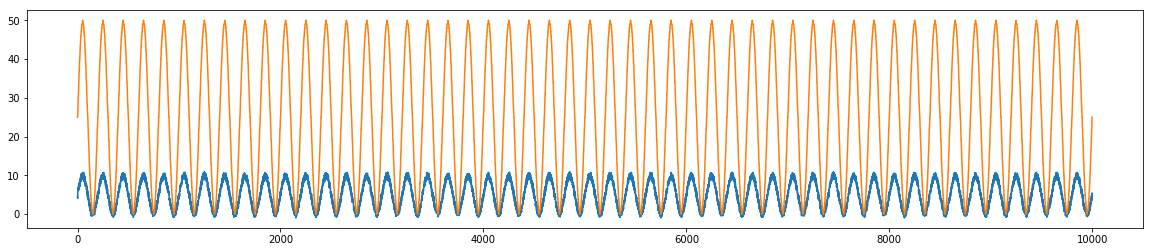

In [1]:
import math, random
import matplotlib.pyplot as plt

states = [int((math.sin(math.pi * i / 100))  * 25) + 25 for i in range(10000)]
observations = [state * 0.2 + random.random() * 2 - 1 for state in states]

print(states[1000:1020])
print(observations[1000:1020])

plt.figure(figsize=(20, 4))
plt.plot(observations)
plt.plot(states)
plt.show()

In [2]:
from hmmlearn.hmm import GaussianHMM
import numpy as np 

import warnings
warnings.filterwarnings('ignore')

shaped_observations = np.array([observations]).T
model = GaussianHMM(
    n_components=max(states) - 1, 
    covariance_type="diag", 
    n_iter=50, 
    verbose=True).fit(shaped_observations)

predicted_states = model.predict(shaped_observations)

         1      -27580.4870             +nan
         2      -24118.6427       +3461.8442
         3      -20427.0862       +3691.5565
         4      -18716.5847       +1710.5015
         5      -16764.8790       +1951.7057
         6      -14992.8951       +1771.9839
         7      -13577.4531       +1415.4420
         8      -12395.6621       +1181.7909
         9      -11656.6253        +739.0369
        10      -11215.0712        +441.5540
        11      -10931.9130        +283.1583
        12      -10748.3171        +183.5958
        13      -10634.4272        +113.8899
        14      -10561.9574         +72.4698
        15      -10512.5763         +49.3811
        16      -10477.2113         +35.3649
        17      -10451.0784         +26.1329
        18      -10431.2866         +19.7918
        19      -10415.9745         +15.3121
        20      -10403.9193         +12.0552
        21      -10394.2928          +9.6264
        22      -10386.5048          +7.7880
        23

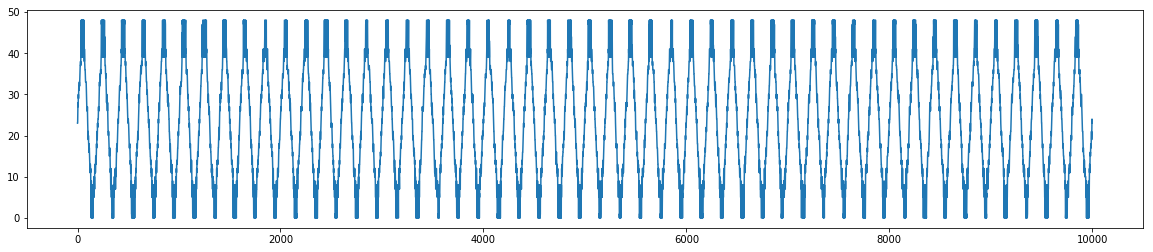

Transition matrix: (49, 49)
P(34|34) = 0.2572350406235258
P(7|7) = 0.27653406137071296
P(44|48) = 0.26308724685766893
P(18|17) = 0.2532453220290318
P(2|0) = 0.3084012955683558
P(13|13) = 0.29109883017240934
P(13|11) = 0.2718117262057945
P(13|14) = 0.2697752854939677
P(29|29) = 0.25808072424251965
P(29|28) = 0.255738673096995
P(42|41) = 0.26515162608169407
P(36|36) = 0.299577631950864
P(36|35) = 0.25769892997629207
P(21|21) = 0.2734697134184416
P(21|20) = 0.2542705221020302
P(8|0) = 0.2896844379880985
P(48|48) = 0.29508338349050406
P(27|27) = 0.25516353654051815
P(27|28) = 0.30409227900638164
P(32|32) = 0.3059192907289434
P(32|33) = 0.319373694831781
P(15|15) = 0.289145574621889
P(15|16) = 0.26143609296422615
P(0|0) = 0.34673058719876904
P(46|48) = 0.29319819188251994
P(10|7) = 0.2610373465210135
P(10|10) = 0.25639485123857
P(10|12) = 0.2535708465541021
P(19|18) = 0.25836600326663717
P(38|38) = 0.2546872165072297
P(43|48) = 0.3307772767726545
P(16|15) = 0.2561216247159795
P(16|16) = 0.2

In [9]:
# re-assign state indices to 
new_states = []
for i in range(model.n_components):
    new_states.append([i, model.means_[i]])

tmp = sorted(new_states, key=lambda x: x[1][0])
d = dict()
for i in range(len(tmp)):
    d[tmp[i][0]] = i
new_predicted_states = [d[s] for s in predicted_states]

plt.figure(figsize=(20,4))
plt.plot(new_predicted_states)
plt.show()

print("Transition matrix:", model.transmat_.shape)
for i in range(model.transmat_.shape[0]):
    for j in range(model.transmat_.shape[1]):
        if model.transmat_[i, j] > 0.25:
            print("P({}|{}) = {}".format(d[i], d[j], model.transmat_[i, j]))